In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop unnecessary columns here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. This can be used for the "Sex" column.

In [ ]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, strings need to be convterted into a categorical representation. There are two main ways to go about this:

I will resolve this by using one-hot encoding. This suggests, for example, [1, 0] for "male" and [0, 1] for female. In this case, I have an array of size (n_categories,) and they represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

In [5]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


In [6]:
# import packages 
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

In [7]:
# Create a Bagged, Random Forest, and Boosted tree for the titanic dataset in the same way that you created a regular Classification Tree.
# I will start by cleaning the dataset and separating the dependent and independent variables
r = 42
titanic_df.drop(['Name', 'PassengerId', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = r)

In [8]:
# Creating the different models
bagged = BaggingClassifier(random_state = r)
random_forest = RandomForestClassifier(random_state = r)
boosted = AdaBoostClassifier(random_state = r)

# Fit the models onto training data
bagged.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
boosted.fit(X_train, y_train)

# Making predictions using the different models
bagged_predictions = bagged.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
boosted_predictions = boosted.predict(X_test)

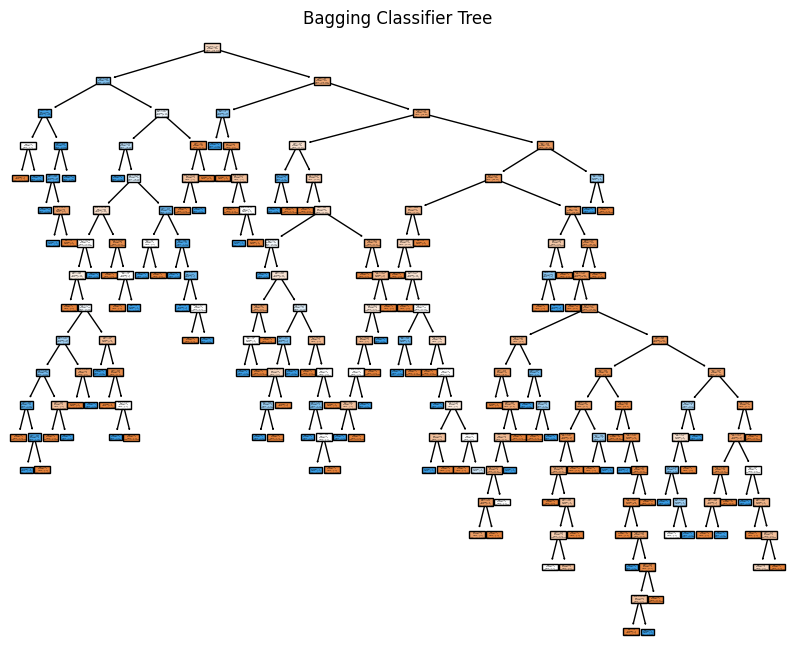

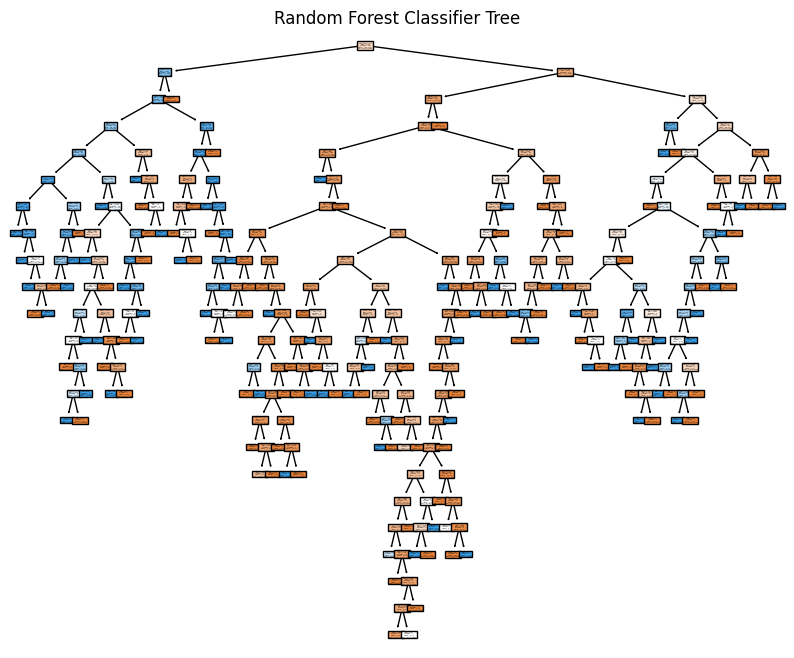

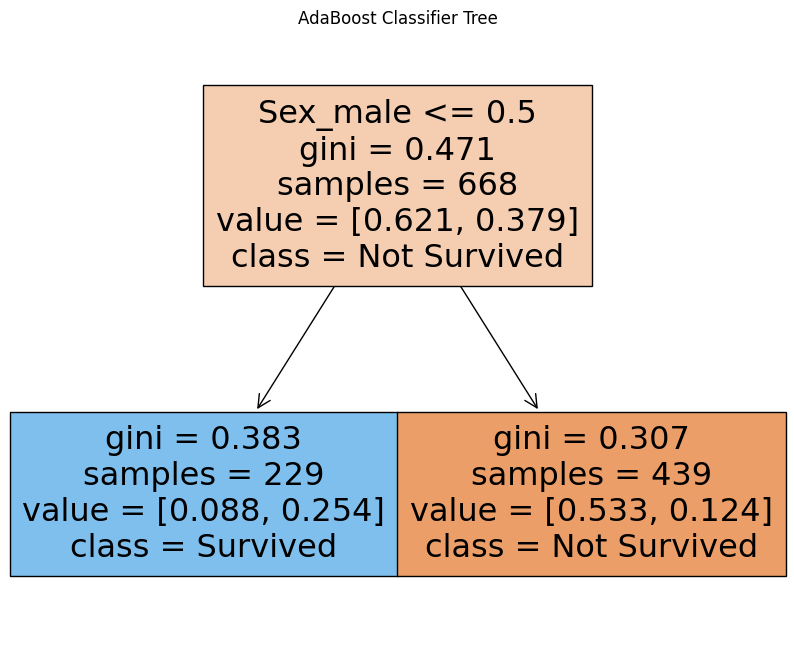

In [9]:
# Plot a tree from Bagging Classifier
plt.figure(figsize=(10,8))
plot_tree(bagged.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Bagging Classifier Tree")
plt.savefig('/Users/ella/Desktop/DS/bagging_classifier_tree.png')
plt.show()

# Plot a tree from Random Forest Classifier
plt.figure(figsize=(10,8))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Random Forest Classifier Tree")
plt.savefig('/Users/ella/Desktop/DS/random_forest_classifier_tree.png')
plt.show()

# Plot a tree from AdaBoost Classifier
plt.figure(figsize=(10,8))
plot_tree(boosted.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("AdaBoost Classifier Tree")
plt.savefig('/Users/ella/Desktop/DS/adaboost_classifier_tree.png')
plt.show()

In [10]:
# From the Random Forest model
# determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.
random_forest = RandomForestClassifier(n_estimators = 100, random_state = r)
random_forest.fit(X_train, y_train)

feature_imp = pd.Series(random_forest.feature_importances_).sort_values(ascending=False)
print(feature_imp)

4    0.292263
1    0.258440
6    0.154978
5    0.131103
0    0.072070
2    0.051436
3    0.039709
dtype: float64


According to the importance scores, the factors that contribute the most towards is Parch, which indicates the number of children of parent a passenger has on board; the second most contributing factor is passenger class; and the third most contributing factor is gender, specifically whether a passenger is a female or not.

In [11]:
# Tune the parameters n_estimators and max_depth.
# I will start by defining the parameters and max depth grid
parameter_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None]
}

# I will be using GridSearchCV to find the optimal estimator number and max length 
# I have chosen accuracy score as the metric to evaluate the model
grid_search = GridSearchCV(estimator = random_forest, param_grid = parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_parameters = grid_search.best_params_
print(f'The best parameters are: {best_parameters}')

The best parameters are: {'max_depth': 10, 'n_estimators': 100}


The output suggests that the random tree model performs best when there are 100 estimators at max depth 10

In [12]:
# Report the accuracy of all models and report which model performed the best 
# including the values for n_estimators and max_depth that the best model had
bagged_accuracy = accuracy_score(y_test, bagged_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
boosted_accuracy = accuracy_score(y_test, boosted_predictions)
# Retrain the random forest model with the best parameters
best_random_forest = RandomForestClassifier(n_estimators = 100, random_state = r, max_depth=10)
best_random_forest.fit(X_train, y_train)
best_rf_predictions = best_random_forest.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

print(f'The accuracy score for the bagged classifier is: {bagged_accuracy}')
print(f'The accuracy score for the randome forest classifier is: {random_forest_accuracy}')
print(f'The accuracy score for the boosted classifier is: {boosted_accuracy}')
print(f'The accuracy score for the random forest classifier with the best parameters is: {best_rf_accuracy}')


The accuracy score for the bagged classifier is: 0.7668161434977578
The accuracy score for the randome forest classifier is: 0.7847533632286996
The accuracy score for the boosted classifier is: 0.8071748878923767
The accuracy score for the random forest classifier with the best parameters is: 0.8116591928251121


According to the accuracy scores calculated above, the model with the highest accuracy score, hence, the model that performed the best is the tuned random forest classifier model, with the values n_estimators=100 and max_depth=10.